<a href="https://colab.research.google.com/github/Delcapa/BDA_6th/blob/main/Jeju(230514).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
jeju_traffic = pd.read_csv('jeju_traffic.csv')

In [ ]:
jeju_traffic.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


## 주어진 제주 교통량 데이터 정리

In [ ]:
jeju_traffic.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target'],
      dtype='object')

In [ ]:
jeju_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [ ]:
jeju_traffic.isna().sum() #결측치 없음을 확인

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [ ]:
jeju_speed = jeju_traffic[['id', 'base_date','day_of_week', 'target']].copy()
jeju_speed.head( )

,id,base_date,day_of_week,target
0,TRAIN_0000000,20220623,목,52.0
1,TRAIN_0000001,20220728,목,30.0
2,TRAIN_0000002,20211010,일,61.0
3,TRAIN_0000003,20220311,금,20.0
4,TRAIN_0000004,20211005,화,38.0


In [ ]:
jeju_speed.info( )
#용량 최소화 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           object 
 1   base_date    int64  
 2   day_of_week  object 
 3   target       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 143.5+ MB


In [ ]:
jeju_speed['base_date'] = jeju_speed['base_date'].astype(str) #datatime사용을 위해 int형으로 된 base_time을 str형으로 변환
jeju_speed['Date'] = pd.to_datetime(jeju_speed['base_date'])
jeju_speed.info( ) # datemtime형태를 Date에 담아줌

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701217 entries, 430379 to 4680098
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   base_date    object        
 2   day_of_week  object        
 3   target       float64       
 4   Date         datetime64[ns]
 5   Year         int64         
 6   Month        int64         
 7   Day          int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 322.8+ MB


In [ ]:
jeju_speed['Year'] = jeju_speed['Date'].dt.year
jeju_speed['Month'] = jeju_speed['Date'].dt.month
jeju_speed['Day'] = jeju_speed['Date'].dt.day

jeju_speed.head()

,id,base_date,day_of_week,target,Date,Year,Month,Day
430379,TRAIN_0430379,20210901,수,37.0,2021-09-01,2021,9,1
1189451,TRAIN_1189451,20210901,수,44.0,2021-09-01,2021,9,1
1827335,TRAIN_1827335,20210901,수,23.0,2021-09-01,2021,9,1
4521509,TRAIN_4521509,20210901,수,58.0,2021-09-01,2021,9,1
1108258,TRAIN_1108258,20210901,수,76.0,2021-09-01,2021,9,1


In [ ]:
jeju_speed.Date.min()

Timestamp('2021-09-01 00:00:00')

In [ ]:
jeju_speed.Date.max() #2021년 9월 1일~ 2022년 7월 31일의 데이터임을 확인

Timestamp('2022-07-31 00:00:00')

In [ ]:
jeju_speed.sort_values(by=['Date'],inplace=True) #시간순으로 정리

In [ ]:
jeju_speed #각 일에 대한 정보가 여러개임을 확인할 수 있음

,id,base_date,day_of_week,target,Date,Year,Month,Day
430379,TRAIN_0430379,20210901,수,37.0,2021-09-01,2021,9,1
1189451,TRAIN_1189451,20210901,수,44.0,2021-09-01,2021,9,1
1827335,TRAIN_1827335,20210901,수,23.0,2021-09-01,2021,9,1
4521509,TRAIN_4521509,20210901,수,58.0,2021-09-01,2021,9,1
1108258,TRAIN_1108258,20210901,수,76.0,2021-09-01,2021,9,1
...,...,...,...,...,...,...,...,...
59263,TRAIN_0059263,20220731,일,20.0,2022-07-31,2022,7,31
78463,TRAIN_0078463,20220731,일,37.0,2022-07-31,2022,7,31
701478,TRAIN_0701478,20220731,일,30.0,2022-07-31,2022,7,31
1518849,TRAIN_1518849,20220731,일,16.0,2022-07-31,2022,7,31


In [ ]:
jeju_com = jeju_speed.groupby(['Year','Month']).agg(speed=('target','mean')).reset_index()

In [ ]:
jeju_com['구분연월'] = jeju_com['Year'].astype(str) + "-" + jeju_com['Month'].astype(str)

## 사용할 제주 공공데이터

In [ ]:
jeju_foreign2021 = pd.read_csv('jeju_foreign2021.csv', encoding='cp949')
jeju_foreign2021

,해당연월,일본,중국,홍콩,대만,싱가폴,말레이시아,인도네시아,베트남,태국,아시아 기타,미국,서구 기타,데이터기준일자
0,2021-01,28,418,18,24,0,36,6,11,22,401,411,969,2021-12-31
1,2021-02,51,440,17,28,0,58,43,21,17,469,564,1348,2021-12-31
2,2021-03,70,783,10,25,0,76,48,35,40,509,830,1585,2021-12-31
3,2021-04,75,706,25,22,4,71,56,64,17,619,771,1672,2021-12-31
4,2021-05,82,770,21,41,17,44,37,26,23,545,911,1567,2021-12-31
5,2021-06,97,481,33,20,10,81,43,63,56,678,1043,2008,2021-12-31
6,2021-07,99,463,26,25,18,84,61,74,89,677,1161,1850,2021-12-31
7,2021-08,85,499,30,42,27,71,133,86,77,675,905,1746,2021-12-31
8,2021-09,84,487,1,15,11,110,128,79,108,739,1279,1984,2021-12-31
9,2021-10,88,446,8,20,31,40,56,58,43,613,922,1614,2021-12-31


In [ ]:
jeju_foreign2022 = pd.read_csv('jeju_foreign2022.csv', encoding='cp949')
jeju_foreign2022

,해당연월,일본,중국,홍콩,대만,싱가폴,말레이시아,인도네시아,베트남,태국,아시아 기타,미국,서구 기타,관련부서,데이터기준일자
0,2022-01,116,450,5,12,37,40,18,34,81,671,887,1550,제주특별자치도 관광정책과,2023-02-24
1,2022-02,85,367,7,17,27,28,56,28,45,517,714,1257,제주특별자치도 관광정책과,2023-02-24
2,2022-03,85,372,20,13,33,43,37,44,58,558,757,1238,제주특별자치도 관광정책과,2023-02-24
3,2022-04,103,431,7,8,54,36,57,29,59,658,867,1378,제주특별자치도 관광정책과,2023-02-24
4,2022-05,175,525,34,43,92,70,60,60,88,726,1082,1619,제주특별자치도 관광정책과,2023-02-24
5,2022-06,134,628,112,110,583,184,87,79,217,894,1087,1507,제주특별자치도 관광정책과,2023-02-24
6,2022-07,138,963,78,114,808,375,106,139,123,915,1140,1588,제주특별자치도 관광정책과,2023-02-24
7,2022-08,240,1072,52,64,930,358,100,135,1000,929,1122,1454,제주특별자치도 관광정책과,2023-02-24
8,2022-09,234,1257,63,89,1361,373,119,86,419,704,1359,1594,제주특별자치도 관광정책과,2023-02-24
9,2022-10,244,1385,119,130,1934,594,94,162,1759,728,1466,1496,제주특별자치도 관광정책과,2023-02-24


In [ ]:
jeju_foreign2022.drop('관련부서', axis=1, inplace=True) # concat을 위해 관련부서 제거

In [ ]:
jeju_foreign = pd.concat([jeju_foreign2021,jeju_foreign2022], axis=0, ignore_index= True)
jeju_foreign #외국 관광객 2021~2022년

,해당연월,일본,중국,홍콩,대만,싱가폴,말레이시아,인도네시아,베트남,태국,아시아 기타,미국,서구 기타,데이터기준일자
0,2021-01,28,418,18,24,0,36,6,11,22,401,411,969,2021-12-31
1,2021-02,51,440,17,28,0,58,43,21,17,469,564,1348,2021-12-31
2,2021-03,70,783,10,25,0,76,48,35,40,509,830,1585,2021-12-31
3,2021-04,75,706,25,22,4,71,56,64,17,619,771,1672,2021-12-31
4,2021-05,82,770,21,41,17,44,37,26,23,545,911,1567,2021-12-31
5,2021-06,97,481,33,20,10,81,43,63,56,678,1043,2008,2021-12-31
6,2021-07,99,463,26,25,18,84,61,74,89,677,1161,1850,2021-12-31
7,2021-08,85,499,30,42,27,71,133,86,77,675,905,1746,2021-12-31
8,2021-09,84,487,1,15,11,110,128,79,108,739,1279,1984,2021-12-31
9,2021-10,88,446,8,20,31,40,56,58,43,613,922,1614,2021-12-31


In [ ]:
jeju_foreign['sum_foreign'] = jeju_foreign.sum(axis=1, numeric_only= True) # 행별 관광객 수
jeju_foreign

,해당연월,일본,중국,홍콩,대만,싱가폴,말레이시아,인도네시아,베트남,태국,아시아 기타,미국,서구 기타,데이터기준일자,sum_foreign
0,2021-01,28,418,18,24,0,36,6,11,22,401,411,969,2021-12-31,2344
1,2021-02,51,440,17,28,0,58,43,21,17,469,564,1348,2021-12-31,3056
2,2021-03,70,783,10,25,0,76,48,35,40,509,830,1585,2021-12-31,4011
3,2021-04,75,706,25,22,4,71,56,64,17,619,771,1672,2021-12-31,4102
4,2021-05,82,770,21,41,17,44,37,26,23,545,911,1567,2021-12-31,4084
5,2021-06,97,481,33,20,10,81,43,63,56,678,1043,2008,2021-12-31,4613
6,2021-07,99,463,26,25,18,84,61,74,89,677,1161,1850,2021-12-31,4627
7,2021-08,85,499,30,42,27,71,133,86,77,675,905,1746,2021-12-31,4376
8,2021-09,84,487,1,15,11,110,128,79,108,739,1279,1984,2021-12-31,5025
9,2021-10,88,446,8,20,31,40,56,58,43,613,922,1614,2021-12-31,3939


In [ ]:
jeju_foreign_sum=jeju_foreign[['해당연월','sum_foreign']].copy()
jeju_foreign_sum

,해당연월,sum_foreign
0,2021-01,2344
1,2021-02,3056
2,2021-03,4011
3,2021-04,4102
4,2021-05,4084
5,2021-06,4613
6,2021-07,4627
7,2021-08,4376
8,2021-09,5025
9,2021-10,3939


In [ ]:
jeju_korean2021 = pd.read_csv('jeju_korean2021.csv', encoding='cp949',error_bad_lines=False)
#Error tokenizing data. C error: Expected으로 인해 구글링 해결법을 찾아보았더니 error_bad_lines=False가 나와서 사용해보았습니다.
jeju_korean2021

C:\Users\이창현\AppData\Local\Temp\ipykernel_2580\2692707148.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  jeju_korean2021 = pd.read_csv('jeju_korean2021.csv', encoding='cp949',error_bad_lines=False)


,구분연월,행태별(개별여행),행태별(부분패키지),행태별(패키지),목적별(레저스포츠),목적별(회의및업무),목적별(휴양및관람),목적별(친지방문),목적별(교육여행),목적별(기타방문),데이터기준일자
0,2021-01,441595,21627,2450,66786,24075,296742,67606,0,10463,2021-12-31
1,2021-02,778290,12422,0,62141,57452,588701,73437,0,8981,2021-12-31
2,2021-03,849441,31129,8646,78458,93387,643293,55459,0,18619,2021-12-31
3,2021-04,1034696,30652,13411,72673,65902,871832,55939,0,12413,2021-12-31
4,2021-05,1106333,21629,4406,62320,55769,903956,106745,80,3498,2021-12-31
5,2021-06,1118567,13446,2241,68387,60504,934448,62745,0,8170,2021-12-31
6,2021-07,1101365,21266,4254,36274,73069,968782,32663,0,16097,2021-12-31
7,2021-08,942540,21839,5439,43445,51875,848667,18128,0,7703,2021-12-31
8,2021-09,846565,20806,0,74382,40312,556900,173601,0,22176,2021-12-31
9,2021-10,953193,191222,73740,159009,203258,770962,76544,15,8367,2021-12-31


In [ ]:
jeju_korean2022 = pd.read_csv('jeju_korean2022.csv', encoding='cp949')
jeju_korean2022

,구분연월,행태별(개별여행),행태별(부분패키지),행태별(패키지),목적별(레저스포츠),목적별(회의및업무),목적별(휴양및관람),목적별(친지방문),목적별(교육여행),목적별(기타방문),관련부서,데이터기준일자
0,2022-01,1087784,57004,22113,191206,41967,842122,81868,0,9738,제주특별자치도 관광정책과,2023-02-24
1,2022-02,902253,101161,22941,177948,36435,714909,91712,0,5351,제주특별자치도 관광정책과,2023-02-24
2,2022-03,820281,40415,9132,74732,54215,617995,98248,0,24638,제주특별자치도 관광정책과,2023-02-24
3,2022-04,1092748,32692,49329,102377,99160,843283,97450,761,31738,제주특별자치도 관광정책과,2023-02-24
4,2022-05,1227670,40116,34177,94892,127819,918511,121753,5588,33400,제주특별자치도 관광정책과,2023-02-24
5,2022-06,1188756,49863,39229,106281,81591,970029,99722,5233,14992,제주특별자치도 관광정책과,2023-02-24
6,2022-07,1161250,62321,33274,93984,127469,940925,79347,4168,10952,제주특별자치도 관광정책과,2023-02-24
7,2022-08,1147083,50347,76722,78134,107508,965567,105225,8311,9407,제주특별자치도 관광정책과,2023-02-24
8,2022-09,917833,52202,81464,105463,132072,695645,83973,23146,11200,제주특별자치도 관광정책과,2023-02-24
9,2022-10,1099375,45964,126194,107477,125821,879740,81672,55167,21656,제주특별자치도 관광정책과,2023-02-24


In [ ]:
jeju_korean2022.drop('관련부서', axis=1, inplace=True) # concat을 위해 관련부서 제거

In [ ]:
jeju_korean2022

,구분연월,행태별(개별여행),행태별(부분패키지),행태별(패키지),목적별(레저스포츠),목적별(회의및업무),목적별(휴양및관람),목적별(친지방문),목적별(교육여행),목적별(기타방문),데이터기준일자
0,2022-01,1087784,57004,22113,191206,41967,842122,81868,0,9738,2023-02-24
1,2022-02,902253,101161,22941,177948,36435,714909,91712,0,5351,2023-02-24
2,2022-03,820281,40415,9132,74732,54215,617995,98248,0,24638,2023-02-24
3,2022-04,1092748,32692,49329,102377,99160,843283,97450,761,31738,2023-02-24
4,2022-05,1227670,40116,34177,94892,127819,918511,121753,5588,33400,2023-02-24
5,2022-06,1188756,49863,39229,106281,81591,970029,99722,5233,14992,2023-02-24
6,2022-07,1161250,62321,33274,93984,127469,940925,79347,4168,10952,2023-02-24
7,2022-08,1147083,50347,76722,78134,107508,965567,105225,8311,9407,2023-02-24
8,2022-09,917833,52202,81464,105463,132072,695645,83973,23146,11200,2023-02-24
9,2022-10,1099375,45964,126194,107477,125821,879740,81672,55167,21656,2023-02-24


In [ ]:
jeju_korean = pd.concat([jeju_korean2021,jeju_korean2022], axis=0, ignore_index= True)
jeju_korean #외국 관광객 2021~2022년

,구분연월,행태별(개별여행),행태별(부분패키지),행태별(패키지),목적별(레저스포츠),목적별(회의및업무),목적별(휴양및관람),목적별(친지방문),목적별(교육여행),목적별(기타방문),데이터기준일자
0,2021-01,441595,21627,2450,66786,24075,296742,67606,0,10463,2021-12-31
1,2021-02,778290,12422,0,62141,57452,588701,73437,0,8981,2021-12-31
2,2021-03,849441,31129,8646,78458,93387,643293,55459,0,18619,2021-12-31
3,2021-04,1034696,30652,13411,72673,65902,871832,55939,0,12413,2021-12-31
4,2021-05,1106333,21629,4406,62320,55769,903956,106745,80,3498,2021-12-31
5,2021-06,1118567,13446,2241,68387,60504,934448,62745,0,8170,2021-12-31
6,2021-07,1101365,21266,4254,36274,73069,968782,32663,0,16097,2021-12-31
7,2021-08,942540,21839,5439,43445,51875,848667,18128,0,7703,2021-12-31
8,2021-09,846565,20806,0,74382,40312,556900,173601,0,22176,2021-12-31
9,2021-10,953193,191222,73740,159009,203258,770962,76544,15,8367,2021-12-31


In [ ]:
jeju_korean['sum_korean'] = jeju_korean.sum(axis=1, numeric_only= True)/2 # 행별 관광객 수, 행의 합은 2번 나오기에 1/2해줬습니다.
jeju_korean

,구분연월,행태별(개별여행),행태별(부분패키지),행태별(패키지),목적별(레저스포츠),목적별(회의및업무),목적별(휴양및관람),목적별(친지방문),목적별(교육여행),목적별(기타방문),데이터기준일자,sum_korean
0,2021-01,441595,21627,2450,66786,24075,296742,67606,0,10463,2021-12-31,465672.0
1,2021-02,778290,12422,0,62141,57452,588701,73437,0,8981,2021-12-31,790712.0
2,2021-03,849441,31129,8646,78458,93387,643293,55459,0,18619,2021-12-31,889216.0
3,2021-04,1034696,30652,13411,72673,65902,871832,55939,0,12413,2021-12-31,1078759.0
4,2021-05,1106333,21629,4406,62320,55769,903956,106745,80,3498,2021-12-31,1132368.0
5,2021-06,1118567,13446,2241,68387,60504,934448,62745,0,8170,2021-12-31,1134254.0
6,2021-07,1101365,21266,4254,36274,73069,968782,32663,0,16097,2021-12-31,1126885.0
7,2021-08,942540,21839,5439,43445,51875,848667,18128,0,7703,2021-12-31,969818.0
8,2021-09,846565,20806,0,74382,40312,556900,173601,0,22176,2021-12-31,867371.0
9,2021-10,953193,191222,73740,159009,203258,770962,76544,15,8367,2021-12-31,1218155.0


In [ ]:
jeju_korean_sum=jeju_korean[['구분연월','sum_korean']].copy()
jeju_korean_sum

,구분연월,sum_korean
0,2021-01,465672.0
1,2021-02,790712.0
2,2021-03,889216.0
3,2021-04,1078759.0
4,2021-05,1132368.0
5,2021-06,1134254.0
6,2021-07,1126885.0
7,2021-08,969818.0
8,2021-09,867371.0
9,2021-10,1218155.0


In [ ]:
jeju_foreign_sum.columns=['구분연월','sum_foreign'] # 두 개를 merge할때 사용할 키인 연도와 월의 칼럼명이 달라서 변경 필요
jeju_foreign_sum

,구분연월,sum_foreign
0,2021-01,2344
1,2021-02,3056
2,2021-03,4011
3,2021-04,4102
4,2021-05,4084
5,2021-06,4613
6,2021-07,4627
7,2021-08,4376
8,2021-09,5025
9,2021-10,3939


In [ ]:
jeju_travler = pd.merge(jeju_korean_sum, jeju_foreign_sum, on='구분연월')
jeju_travler

,구분연월,sum_korean,sum_foreign
0,2021-01,465672.0,2344
1,2021-02,790712.0,3056
2,2021-03,889216.0,4011
3,2021-04,1078759.0,4102
4,2021-05,1132368.0,4084
5,2021-06,1134254.0,4613
6,2021-07,1126885.0,4627
7,2021-08,969818.0,4376
8,2021-09,867371.0,5025
9,2021-10,1218155.0,3939


In [ ]:
jeju_travler['sum_korean'] = jeju_travler['sum_korean'].astype(int) #타입을 맞춰줌
jeju_travler

,구분연월,sum_korean,sum_foreign
0,2021-01,465672,2344
1,2021-02,790712,3056
2,2021-03,889216,4011
3,2021-04,1078759,4102
4,2021-05,1132368,4084
5,2021-06,1134254,4613
6,2021-07,1126885,4627
7,2021-08,969818,4376
8,2021-09,867371,5025
9,2021-10,1218155,3939


## 주어진 데이터와 사용할 데이터 merge

In [ ]:
jeju_travler.head()

,구분연월,sum_korean,sum_foreign
0,2021-01,465672,2344
1,2021-02,790712,3056
2,2021-03,889216,4011
3,2021-04,1078759,4102
4,2021-05,1132368,4084


In [ ]:
jeju_com['구분연월'] = jeju_com['구분연월'].astype(str)
jeju_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10 non-null     int64  
 1   Month   10 non-null     int64  
 2   speed   10 non-null     float64
 3   구분연월    10 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [ ]:
jeju_com #구분연월의 날짜형식을 맞춰줘야함
for i in range(10):
    if len(jeju_com['구분연월'][i]) == 6:
        jeju_com['구분연월'][i]= jeju_com['구분연월'][i][:5] + '0' + jeju_com['구분연월'][i][5:]

C:\Users\이창현\AppData\Local\Temp\ipykernel_2580\2796230139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeju_com['구분연월'][i]= jeju_com['구분연월'][i][:5] + '0' + jeju_com['구분연월'][i][5:]


In [ ]:
jeju = pd.merge(jeju_travler, jeju_com, on='구분연월')
jeju

,구분연월,sum_korean,sum_foreign,Year,Month,speed
0,2021-09,867371,5025,2021,9,43.694340
1,2021-10,1218155,3939,2021,10,43.495717
2,2021-11,1200047,4297,2021,11,43.728215
3,2021-12,1086902,3705,2021,12,43.030021
4,2022-01,1166901,3901,2022,1,43.033130
5,2022-02,1026355,3148,2022,2,43.256182
6,2022-03,869828,3258,2022,3,43.548673
7,2022-05,1301963,4574,2022,5,42.639328
8,2022-06,1277848,5622,2022,6,42.614157
9,2022-07,1256845,6487,2022,7,36.282302


In [ ]:
jeju.drop(['Year','Month'], axis=1, inplace=True) #간소화

In [ ]:
jeju['sum'] = jeju['sum_korean'] +jeju['sum_foreign'] # sum이라는 외국, 한국 관광객 수 합친 칼럼 생성

In [ ]:
jeju

,구분연월,sum_korean,sum_foreign,speed,sum
0,2021-09,867371,5025,43.694340,872396
1,2021-10,1218155,3939,43.495717,1222094
2,2021-11,1200047,4297,43.728215,1204344
3,2021-12,1086902,3705,43.030021,1090607
4,2022-01,1166901,3901,43.033130,1170802
5,2022-02,1026355,3148,43.256182,1029503
6,2022-03,869828,3258,43.548673,873086
7,2022-05,1301963,4574,42.639328,1306537
8,2022-06,1277848,5622,42.614157,1283470
9,2022-07,1256845,6487,36.282302,1263332


## 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### 가설: 관광객 수가 많을수록 차량이 많아져 교통체증이 발생하여 평균속도가 줄어들 것이다

<AxesSubplot:title={'center':'2021년 09월부터 2022년 07월 관광객 수 추이'}, xlabel='구분연월', ylabel='관광객 수(백만 단위)'>

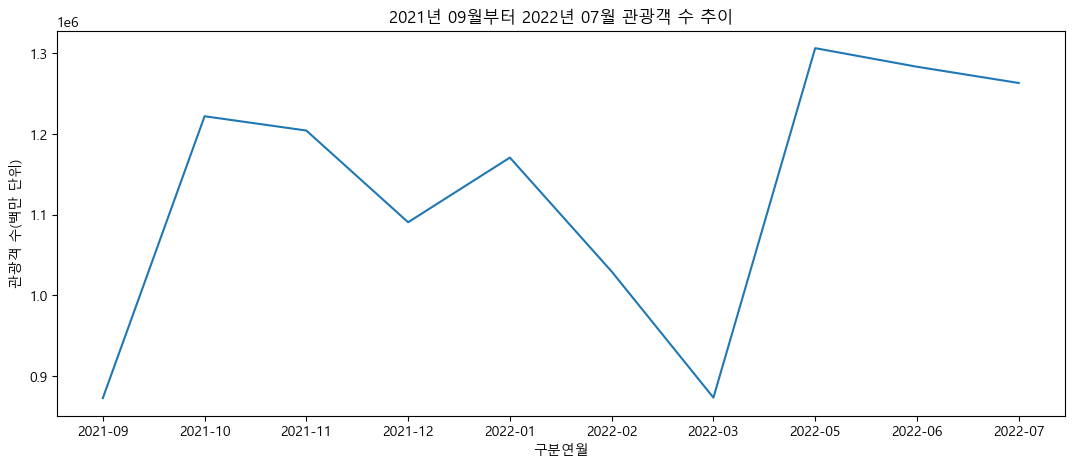

In [ ]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #한글 깨지는 것

plt.figure(figsize = (13, 5))
plt.title('2021년 09월부터 2022년 07월 관광객 수 추이')
plt.ylabel('관광객 수(백만 단위)')

sns.lineplot(data= jeju, x='구분연월', y= 'sum')

<AxesSubplot:title={'center':'2021년 09월부터 2022년 07월 평균속도'}, xlabel='구분연월', ylabel='평균 속도(km/h)'>

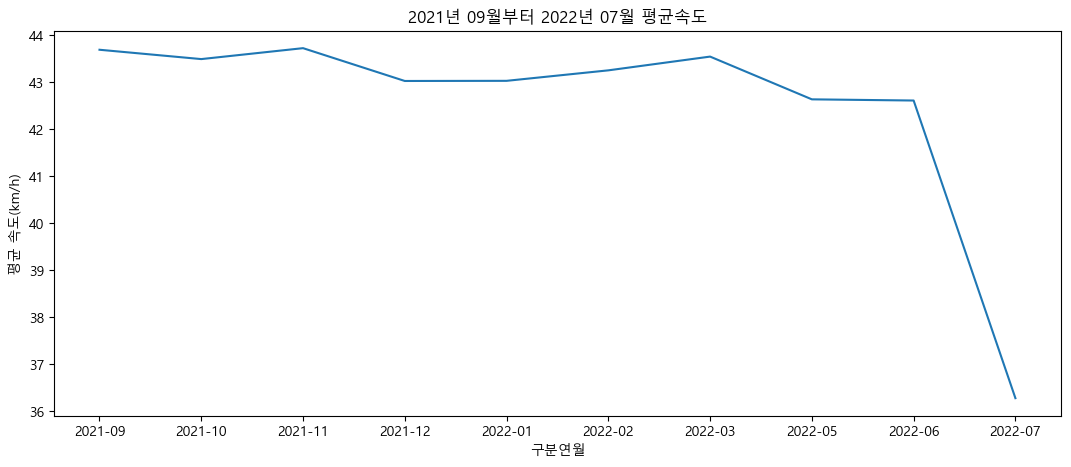

In [ ]:
plt.figure(figsize = (13, 5))
plt.title('2021년 09월부터 2022년 07월 평균속도')
plt.ylabel('평균 속도(km/h)')

sns.lineplot(data= jeju, x='구분연월', y= 'speed')

In [ ]:
corr = jeju.corr()
corr

,sum_korean,sum_foreign,speed,sum
sum_korean,1.000000,0.459675,-0.385847,0.999983
sum_foreign,0.459675,1.000000,-0.725099,0.464868
speed,-0.385847,-0.725099,1.000000,-0.389452
sum,0.999983,0.464868,-0.389452,1.000000


<AxesSubplot:>

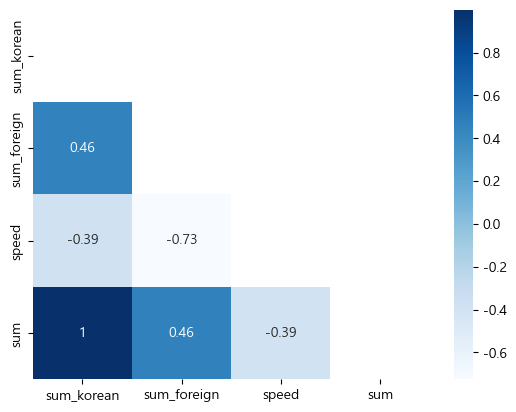

In [ ]:
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool)) # 보기 편하게 정리
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)

### 결과:

* 시각화한 결과 2021년 9월 2022년 3월에 관광객 수는 적었음에도 그 달의 평균속도는 높은 순위에 있음을 알 수 있다.
* 2022년 7월에는 관광객이 많았음에도 오히려 평균 속도가 줄었들었다.

* 상관계수로 확인해본 결과 관광객 수 (sum)과 평균 속도(speed)의 상관 관꼐는 -0.39으로 낮은 음의 상관관계를 가짐을 확인할 수 있다.

* 이러한 이유로 '관광객 수가 많을수록 차량이 많아져 교통체증이 발생하여 평균속도가 줄어들 것이다'라는 나의 가설은 적절하지 않는 가설이라고 판단된다.
* 따라서 관광객 수와 평균 속도에는 큰 상관관계가 없다.